**CV EXP 7**

**Disparity Estimation / Depth map generation**

Name: Pranay Gupta

PRN: 1032211057

Division: A1

Batch: A4

Date: 17 April 2024

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
left_image = cv2.imread('/content/stereoimage1-0000.jpg')
right_image = cv2.imread('/content/stereoimage2-0000.jpg')

In [ ]:
# Step 2: Ensure shape, size, dtype are the same
assert left_image.shape == right_image.shape, "Images should have the same dimensions"
assert left_image.dtype == right_image.dtype, "Images should have the same data type"

In [ ]:
# Step 3: Convert images to grayscale
left_gray = cv2.cvtColor(left_image, cv2.COLOR_BGR2GRAY)
right_gray = cv2.cvtColor(right_image, cv2.COLOR_BGR2GRAY)

In [ ]:
# Step 4: Set parameters for StereoBM
# You can adjust these parameters according to your specific needs
num_disparities = 16
block_size = 21

In [ ]:
# Step 5: Find disparity map
stereo = cv2.StereoBM_create(numDisparities=num_disparities, blockSize=block_size)
disparity_map = stereo.compute(left_gray, right_gray)


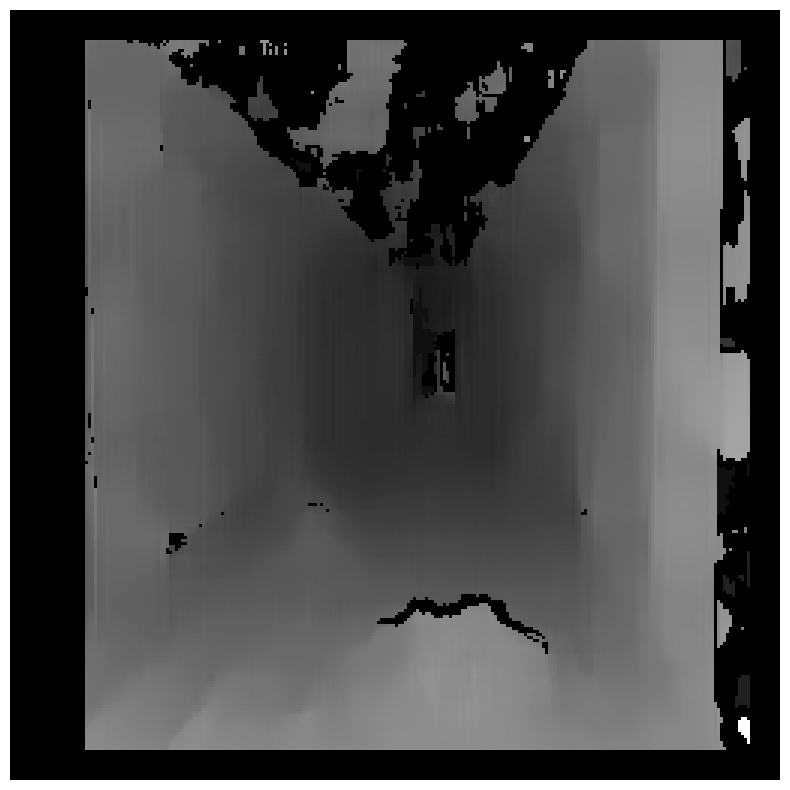

In [ ]:
# Step 6: Display disparity map with normalization
disparity_map_normalized = cv2.normalize(disparity_map, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
#cv2.imshow('Disparity Map', disparity_map_normalized)

plt.figure(figsize=(10,10))
plt.imshow(disparity_map_normalized, cmap = 'gray')
plt.axis('off')
plt.show()

In [ ]:
# Step 7: Find depth map if required (You may need camera calibration parameters for accurate depth)
# Assuming baseline and focal length are known
baseline = 10  # Example baseline in meters 0.1
focal_length = 10  # Example focal length in pixels 0.8


In [ ]:
depth_map = (focal_length * baseline) / (disparity_map + 1e-6)  # Avoid division by zero
depth_map = cv2.normalize(depth_map, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

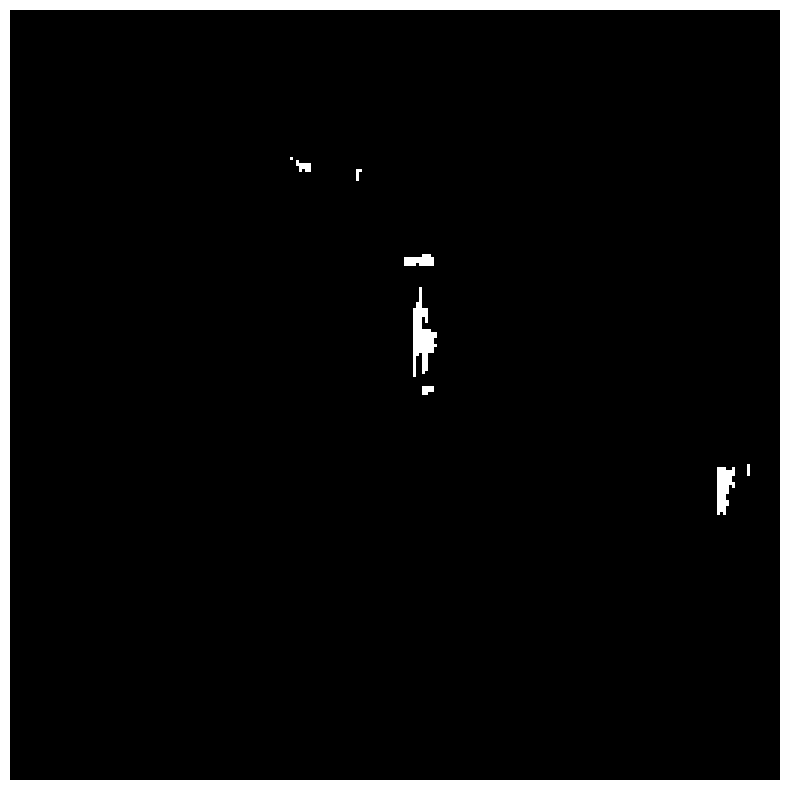

In [ ]:
# Step 8: Display depth map if required
plt.figure(figsize=(10,10))
plt.imshow(depth_map, cmap = 'gray')
plt.axis('off')
plt.show()